In [ ]:
library(limma)
library(edgeR)
library(here)
library(ggplot2)
library(gplots)
source(here("R_functions","edgeR_function.R"))

In [4]:
bulk_pb_intersection = read.csv("/home/robotmessenger810/sc_analysis/data/pseudo_bulk_data/WT_up_bulk_sc_intersection.csv")

In [5]:
#bulk samples
bulk = counts_to_reads_df("/home/robotmessenger810/sc_analysis/data/bulk_data/Col_h3h3_fals")

[1] "A1_S39_L002_R1_001.trimmed_UMIAligned.outsorted_dedup.bam_counts.gz"
[1] "A2_S33_L002_R1_001.trimmed_UMIAligned.outsorted_dedup.bam_counts.gz"
[1] "B1_S32_L002_R1_001.trimmed_UMIAligned.outsorted_dedup.bam_counts.gz"
[1] "B2_S34_L002_R1_001.trimmed_UMIAligned.outsorted_dedup.bam_counts.gz"
[1] "C1_S27_L002_R1_001.trimmed_UMIAligned.outsorted_dedup.bam_counts.gz"
[1] "C2_S35_L002_R1_001.trimmed_UMIAligned.outsorted_dedup.bam_counts.gz"
[1] "D1_S28_L002_R1_001.trimmed_UMIAligned.outsorted_dedup.bam_counts.gz"
[1] "D2_S36_L002_R1_001.trimmed_UMIAligned.outsorted_dedup.bam_counts.gz"
[1] "E1_S29_L002_R1_001.trimmed_UMIAligned.outsorted_dedup.bam_counts.gz"
[1] "E2_S40_L002_R1_001.trimmed_UMIAligned.outsorted_dedup.bam_counts.gz"
[1] "F1_S30_L002_R1_001.trimmed_UMIAligned.outsorted_dedup.bam_counts.gz"
[1] "F2_S37_L002_R1_001.trimmed_UMIAligned.outsorted_dedup.bam_counts.gz"
[1] "G1_S31_L002_R1_001.trimmed_UMIAligned.outsorted_dedup.bam_counts.gz"
[1] "G2_S25_L002_R1_001.trimmed_UMIAli

In [6]:
colnames(bulk) = c("Col_1","fal7_1","Col_2","fal7_2","Col_3","fal7_3","Col_4","fal7_4","h3h3_1","fal3_1","h3h3_2","fal3_2", "h3h3_3","fal3_3","h3h3_4","fal3_4")

In [7]:
bulk2 = bulk[,-13]
head(bulk2)

,Col_1,fal7_1,Col_2,fal7_2,Col_3,fal7_3,Col_4,fal7_4,h3h3_1,fal3_1,h3h3_2,fal3_2,fal3_3,h3h3_4,fal3_4
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
AT1G01010,22,23,23,26,8,12,36,8,27,21,4,16,31,21,22
AT1G01020,138,81,102,101,55,67,141,41,102,88,59,75,75,130,102
AT1G01030,21,14,19,19,7,15,18,11,19,14,10,10,16,15,19
AT1G01040,303,145,236,206,74,103,249,42,215,156,111,93,173,187,111
AT1G01046,0,0,1,0,2,1,0,0,0,0,1,0,0,0,0
AT1G01050,597,338,465,469,242,255,544,140,469,303,349,322,294,535,366


In [ ]:

  #make DGElist
  x3 <- DGEList(counts = bulk2, genes = rownames(bulk2))
  
  
  #reads per library uniquely mapped to a gene:
  
  #make cpm and lcpm
  cpm <- cpm(x3)
  lcpm <- cpm(x3, log=TRUE)
  
  #keep only genes that are expressed. "Expressed" here means counts observed in at least 3 samples
  dim(x3)
  keep.exprs <- rowSums(cpm>0)>=3
  x3 <- x3[keep.exprs,, keep.lib.sizes=FALSE]
  dim(x3) #compare to dim(x) above
  
  #normalize data after removing low expressed genes
  x3 <- calcNormFactors(x3)
  
  #cpm, lcpm of normalized values
  cpm <- cpm(x3)
  lcpm <- cpm(x3, log=TRUE)

plotMDS(lcpm)
  

In [9]:
de_sub = lcpm[rownames(lcpm) %in% unlist(bulk_pb_intersection$x),]

In [10]:
de_sub_av = cbind(rowMeans(de_sub[,c(1,3,5,7)]), rowMeans(de_sub[,c(9,11,14)]), rowMeans(de_sub[,c(2,4,6,8)]), rowMeans(de_sub[,c(10,12,13, 15)]))

In [11]:
colnames(de_sub_av) = c("wt", "h3h3", "fal7", "fal3")

In [12]:
head(de_sub_av)

,wt,h3h3,fal7,fal3
AT1G02390,3.682254,2.473298,3.824465,3.614386
AT1G05260,7.684157,7.093831,7.438994,7.398936
AT1G15385,4.389574,2.209898,3.223487,3.101048
AT1G19200,4.590667,4.113752,4.745673,4.783227
AT1G30760,5.187268,4.352906,5.711771,5.581185
AT1G35910,4.908952,3.781306,3.927556,3.870882


Warning message in heatmap.2(de_sub_av - rowMeans(de_sub_av[, (c(1, 2))]), Rowv = NA, :
“Discrepancy: Rowv is FALSE, while dendrogram is `both'. Omitting row dendogram.”
Warning message in heatmap.2(de_sub_av - rowMeans(de_sub_av[, (c(1, 2))]), Rowv = NA, :
“Discrepancy: Colv is FALSE, while dendrogram is `column'. Omitting column dendogram.”


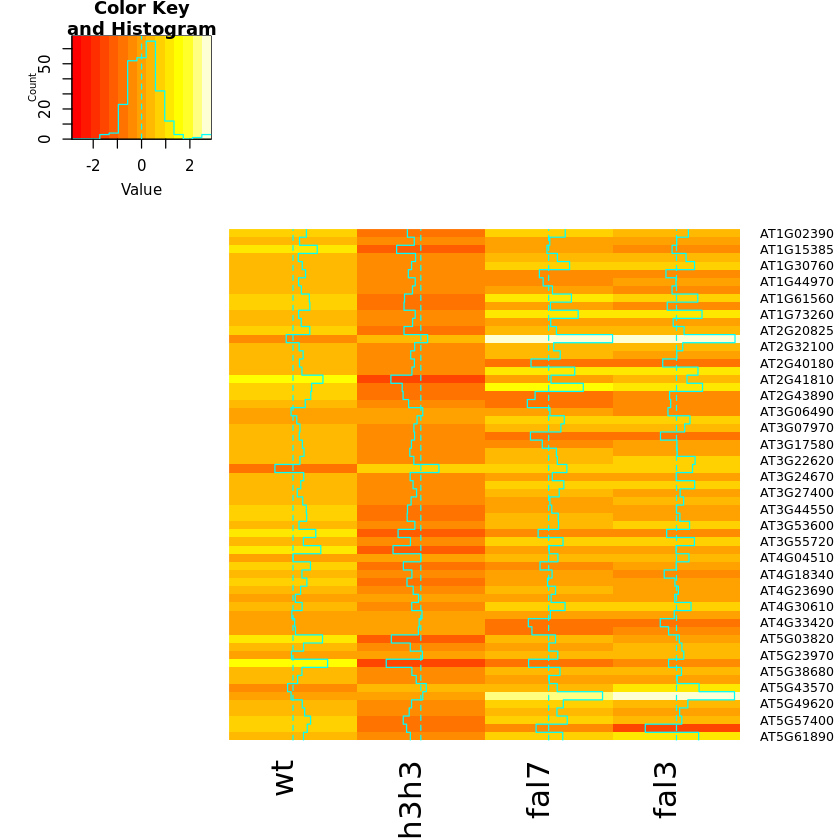

In [14]:
heatmap.2(de_sub_av-rowMeans(de_sub_av[,(c(1,2))]), Rowv=NA, Colv=NA, col = c('red3', 'red3', 'royalblue', 'red3', 'royalblue'))

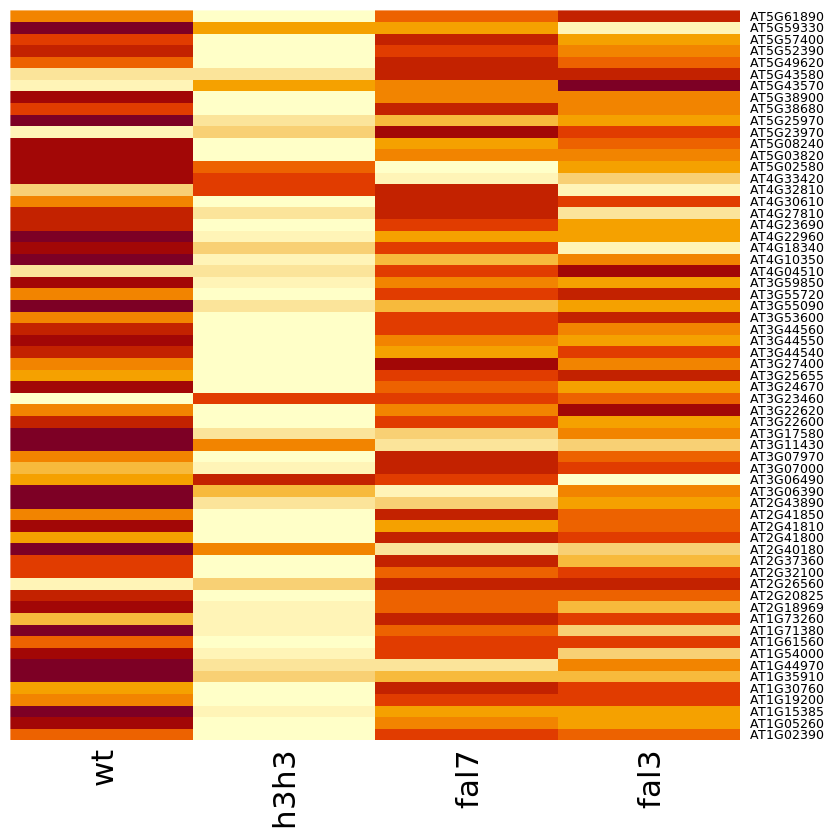

In [44]:
heatmap(de_sub_av-rowMeans(de_sub_av[,(c(1,2))]), Rowv=NA, Colv=NA)

In [26]:
#bulk samples
bulk = counts_to_reads_df("/home/robotmessenger810/sc_analysis/data/bulk_data/Col_h3h3_ein2_yda_KI")


[1] "893_1_YDA-KI_S1_R1_001_UMIAligned.outsorted_dedup.bam_counts"
[1] "893_2_YDA-KI_S24_R1_001_UMIAligned.outsorted_dedup.bam_counts"
[1] "894_1_YDA-KI_S7_R1_001_UMIAligned.outsorted_dedup.bam_counts"
[1] "894_2_YDA-KI_S16_R1_001_UMIAligned.outsorted_dedup.bam_counts"
[1] "895_1_YDA-KI_S23_R1_001_UMIAligned.outsorted_dedup.bam_counts"
[1] "895_2_YDA-KI_S20_R1_001_UMIAligned.outsorted_dedup.bam_counts"
[1] "896_1_YDA-KI_S15_R1_001_UMIAligned.outsorted_dedup.bam_counts"
[1] "896_2_YDA-KI_S6_R1_001_UMIAligned.outsorted_dedup.bam_counts"
[1] "Col_1_S21_R1_001_UMIAligned.outsorted_dedup.bam_counts"
[1] "Col_2_S26_R1_001_UMIAligned.outsorted_dedup.bam_counts"
[1] "Col_3_S14_R1_001_UMIAligned.outsorted_dedup.bam_counts"
[1] "Col_4_S9_R1_001_UMIAligned.outsorted_dedup.bam_counts"
[1] "Col_5_S2_R1_001_UMIAligned.outsorted_dedup.bam_counts"
[1] "Col_6_S12_R1_001_UMIAligned.outsorted_dedup.bam_counts"
[1] "ein2_1_S28_R1_001_UMIAligned.outsorted_dedup.bam_counts"
[1] "ein2_2_S13_R1_001_UMIAligned

In [27]:
ein2 = bulk[,c(9:14, 21:26, 15:20)]

In [28]:
head(ein2)

,V9,V10,V11,V12,V13,V14,V21,V22,V23,V24,V25,V26,V15,V16,V17,V18,V19,V20
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
AT1G01010,0,1,1,6,1,8,2,4,3,4,2,5,1,6,2,4,0,3
AT1G01020,2,8,13,10,8,17,17,15,24,13,9,12,8,16,10,11,5,6
AT1G01030,0,0,0,1,1,1,1,5,2,1,5,1,0,1,0,3,0,0
AT1G01040,1,25,24,41,25,49,48,62,52,34,37,15,28,56,32,121,23,25
AT1G01046,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AT1G01050,9,64,76,83,54,153,72,126,135,67,111,36,57,191,66,125,39,43


[1] 32838    18

[1] 22384    18

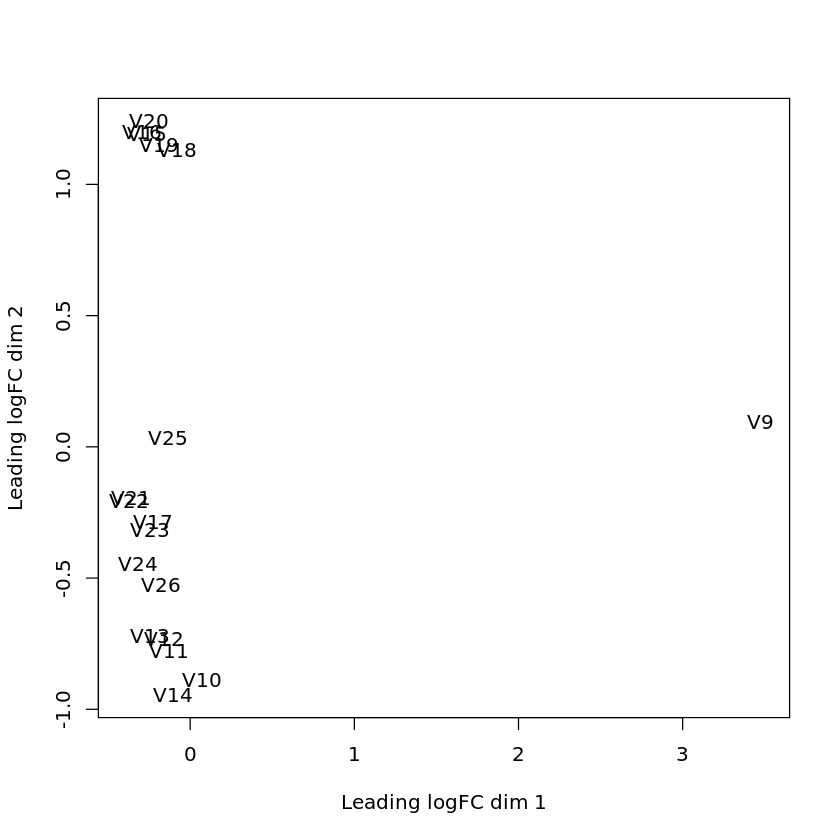

In [30]:

  #make DGElist
  x3 <- DGEList(counts = ein2, genes = rownames(ein2))
  
  
  #reads per library uniquely mapped to a gene:
  
  #make cpm and lcpm
  cpm <- cpm(x3)
  lcpm <- cpm(x3, log=TRUE)
  
  #keep only genes that are expressed. "Expressed" here means counts observed in at least 3 samples
  dim(x3)
  keep.exprs <- rowSums(cpm>0)>=3
  x3 <- x3[keep.exprs,, keep.lib.sizes=FALSE]
  dim(x3) #compare to dim(x) above
  
  #normalize data after removing low expressed genes
  x3 <- calcNormFactors(x3)
  
  #cpm, lcpm of normalized values
  cpm <- cpm(x3)
  lcpm <- cpm(x3, log=TRUE)

plotMDS(lcpm)
  

In [38]:
ein2_de_sub_av = cbind(rowMeans(lcpm[,c(1:6)]), rowMeans(lcpm[,c(7,8,10,11,12)]), rowMeans(lcpm[,c(13:18)]))
ein2_de_sub_av = ein2_de_sub_av[rownames(ein2_de_sub_av) %in% bulk_pb_intersection[,2],]

In [40]:
colnames(ein2_de_sub_av) = c("wt", "h3h3", "ein2")
head(ein2_de_sub_av)

,wt,h3h3,ein2
AT1G02390,3.790713,2.316218,1.336494
AT1G05260,7.365601,6.813620,3.380951
AT1G15385,3.178748,1.946507,1.288550
AT1G19200,4.334950,3.569826,3.046021
AT1G30760,4.997953,3.732044,3.747344
AT1G35910,5.203429,3.918797,2.803611


Warning message in ein2_de_sub_av - rowMeans(de_sub_av[, (c(1, 2))]):
“longer object length is not a multiple of shorter object length”


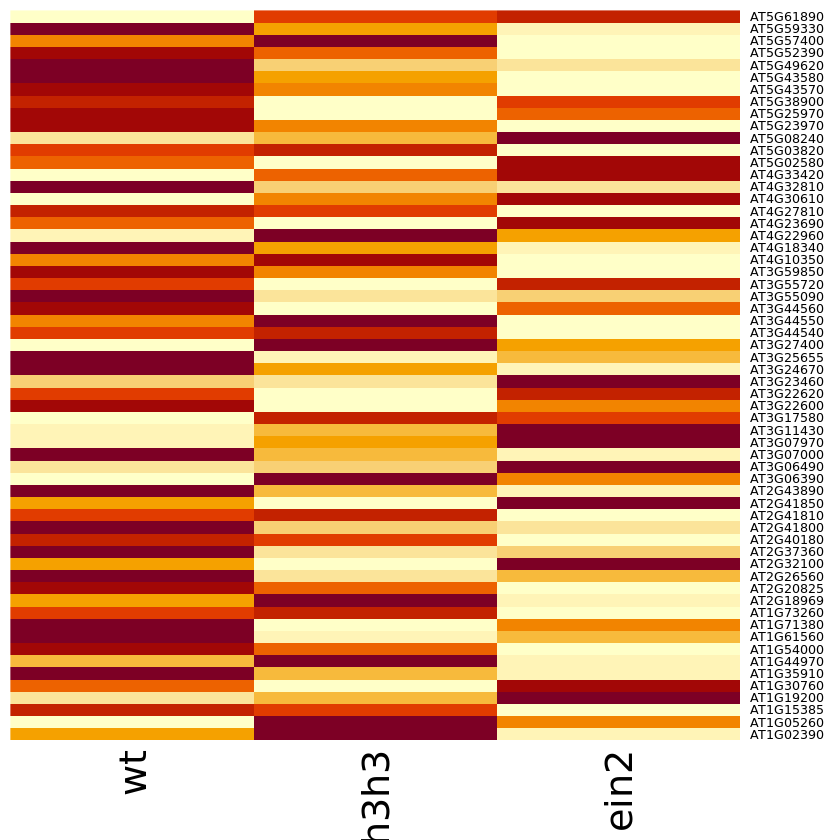

In [41]:
heatmap(ein2_de_sub_av-rowMeans(de_sub_av[,(c(1,2))]), Rowv=NA, Colv=NA)